# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [100]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [101]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [102]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [103]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [104]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [105]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [106]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [107]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [108]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [109]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [110]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [111]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [112]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [113]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [114]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent=''
    sentance=sentance.lower()
    sentance = ' '.join(e for e in sentance.split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_essays.append(sent.lower().strip())

NameError: name 'project_data' is not defined

In [116]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations the materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills they also want learn games kids want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [117]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent=''
    sentance=sentance.lower()
    sentance = ' '.join(e for e in sentance.split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 42647.99it/s]


## 1.5 Preparing data for models

In [118]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

In [119]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [1]:
project_data['essay']=preprocessed_essays
project_data['project_title']=preprocessed_titles


NameError: name 'preprocessed_essays' is not defined

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [121]:
df=project_data.sample(frac=0.5)
y=df['project_is_approved'].values
df.drop(['project_is_approved'],axis=1,inplace=True)
X=df

#project_data.drop(['project_is_approved'], axis=1, inplace=True)
#project_data.head(1)

#The following are (X,y) of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
print(len(X_train))
print(len(X_cv))
print(len(X_test))

24520
12078
18026


In [122]:
##We are vectorizing the categorical features using count vectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
fn_ss=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 51) (24520,)
(12078, 51) (12078,)
(18026, 51) (18026,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [123]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype(str)) # fit has to happen only on train data
fn_tp=vectorizer.get_feature_names()
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype(str))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 5) (24520,)
(12078, 5) (12078,)
(18026, 5) (18026,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [124]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer=CountVectorizer(token_pattern='\w+-\d',lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
X_train_project_gradec=vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_gradec=vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_gradec=vectorizer.transform(X_test['project_grade_category'].values)
fn_pgc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_project_gradec.shape, y_train.shape)
print(X_cv_project_gradec.shape, y_cv.shape)
print(X_test_project_gradec.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 4) (24520,)
(12078, 4) (12078,)
(18026, 4) (18026,)
['3-5', '6-8', '9-1', 'PreK-2']


In [125]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
X_train_clean_cat=vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat=vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat=vectorizer.transform(X_test['clean_categories'].values)
fn_cc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 9) (24520,)
(12078, 9) (12078,)
(18026, 9) (18026,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [126]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_clean_subcat=vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat=vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat=vectorizer.transform(X_test['clean_subcategories'].values)
fn_csc=vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_clean_subcat.shape, y_train.shape)
print(X_cv_clean_subcat.shape, y_cv.shape)
print(X_test_clean_subcat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 30) (24520,)
(12078, 30) (12078,)
(18026, 30) (18026,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [127]:
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['essay'].values)
train_text_tfidf=vectorizer.transform(X_train['essay'].values)
cv_text_tfidf=vectorizer.transform(X_cv['essay'].values)
test_text_tfidf=vectorizer.transform(X_test['essay'].values)
feat_tfidf_ess=vectorizer.get_feature_names()

In [129]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X_train['project_title'].values)
train_title_tfidf=vectorizer.transform(X_train['project_title'].values)
cv_title_tfidf=vectorizer.transform(X_cv['project_title'].values)
test_title_tfidf=vectorizer.transform(X_test['project_title'].values)
feat_tfidf_tit=vectorizer.get_feature_names()

In [130]:
from scipy.sparse import hstack
X_tr2= hstack((train_text_tfidf,train_title_tfidf,X_train_state_ohe, X_train_teacher_ohe, X_train_project_gradec,X_train_clean_cat,X_train_clean_subcat, X_train_price_norm)).tocsr()
X_cv2= hstack((cv_text_tfidf,cv_title_tfidf,X_cv_state_ohe, X_cv_teacher_ohe, X_cv_project_gradec,X_cv_clean_cat,X_cv_clean_subcat,X_cv_price_norm)).tocsr()
X_te2= hstack((test_text_tfidf,test_title_tfidf,X_test_state_ohe, X_test_teacher_ohe, X_test_project_gradec,X_test_clean_cat,X_test_clean_subcat,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cv2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 6916) (24520,)
(12078, 6916) (12078,)
(18026, 6916) (18026,)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [133]:
from itertools import chain
tfidf_names=list(chain(feat_tfidf_ess,feat_tfidf_tit,fn_ss,fn_tp,fn_pgc,fn_cc,fn_csc,["price"]))

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dt2.fit(X_tr2,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [135]:
dtfeat=dt2.feature_importances_
dtfeat.shape

(6916,)

In [136]:
ll=X_tr2.todense()
datafeat=pd.DataFrame(ll,columns=tfidf_names)

In [137]:
dtf=DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
dtf.fit(datafeat,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
features=pd.Series(dtf.feature_importances_,tfidf_names).sort_values(ascending=False)
bestfeat=dtf.feature_importances_[:5000]
bestfeat=features[0:5000]
bf=bestfeat.keys()

In [139]:
bfl=list(bf)

In [140]:
def selectkimp(model,X,k=5000):
    return X[:,model.feature_importances_.argsort()[::-1][:k]]
newx=selectkimp(dt2,X_tr2,5000)
newtest=selectkimp(dt2,X_te2,5000)


In [141]:
newx.shape

(24520, 5000)

In [143]:
X=pd.DataFrame(newl,columns=bfl)
X

materials     books  chromebooks       use    nannan    wobble  \
0       0.000000  0.000000     0.000000  0.037921  0.022334  0.000000   
1       0.000000  0.051762     0.000000  0.109254  0.021449  0.000000   
2       0.000000  0.000000     0.000000  0.057414  0.016908  0.000000   
3       0.000000  0.000000     0.000000  0.000000  0.020484  0.000000   
4       0.080848  0.043563     0.067612  0.000000  0.018051  0.000000   
5       0.000000  0.000000     0.000000  0.037127  0.021867  0.000000   
6       0.000000  0.000000     0.000000  0.000000  0.015429  0.000000   
7       0.000000  0.081933     0.000000  0.000000  0.016976  0.000000   
8       0.000000  0.078115     0.000000  0.082438  0.016184  0.000000   
9       0.000000  0.000000     0.000000  0.000000  0.018173  0.000000   
10      0.000000  0.000000     0.000000  0.041956  0.024711  0.000000   
11      0.000000  0.000000     0.000000  0.016147  0.009510  0.000000   
12      0.098090  0.000000     0.000000  0.037185  0.021901  0.000000   
13      0.000000  0.053430     0.000000  0.037591  0.022140  0.000000   
14      0.000000  0.000000     0.000000  0.000000  0.019130  0.000000   
15      0.138243  0.049659     0.000000  0.069876  0.020578  0.000000   
16      0.000000  0.000000     0.000000  0.039243  0.023113  0.000000   
17      0.000000  0.000000     0.000000  0.035783  0.021075  0.000000   
18      0.042268  0.000000     0.000000  0.000000  0.018875  0.077108   
19      0.000000  0.000000     0.000000  0.000000  0.019259  0.000000   
20      0.087746  0.000000     0.000000  0.000000  0.019592  0.000000   
21      0.042128  0.045399     0.000000  0.000000  0.018812  0.000000   
22      0.045066  0.000000     0.000000  0.000000  0.020124  0.000000   
23      0.000000  0.000000     0.000000  0.000000  0.016425  0.000000   
24      0.000000  0.000000     0.071942  0.000000  0.019207  0.000000   
25      0.000000  0.096898     0.000000  0.000000  0.020076  0.000000   
26      0.000000  0.084376     0.000000  0.000000  0.017482  0.000000   
27      0.000000  0.000000     0.000000  0.084114  0.016514  0.000000   
28      0.000000  0.000000     0.000000  0.023760  0.013994  0.000000   
29      0.000000  0.000000     0.000000  0.000000  0.022662  0.000000   
...          ...       ...          ...       ...       ...       ...   
24490   0.000000  0.000000     0.000000  0.000000  0.019932  0.000000   
24491   0.152594  0.000000     0.000000  0.086772  0.017035  0.000000   
24492   0.000000  0.000000     0.053409  0.024211  0.014259  0.000000   
24493   0.040988  0.353365     0.000000  0.031077  0.018303  0.000000   
24494   0.043796  0.000000     0.000000  0.066412  0.019557  0.000000   
24495   0.000000  0.000000     0.000000  0.000000  0.019643  0.000000   
24496   0.000000  0.000000     0.000000  0.000000  0.020599  0.000000   
24497   0.120599  0.303247     0.000000  0.030479  0.017951  0.000000   
24498   0.000000  0.000000     0.000000  0.000000  0.025760  0.000000   
24499   0.000000  0.092337     0.000000  0.000000  0.019131  0.000000   
24500   0.039984  0.129265     0.000000  0.000000  0.017855  0.000000   
24501   0.000000  0.000000     0.000000  0.022787  0.013421  0.054829   
24502   0.040969  0.000000     0.000000  0.000000  0.018295  0.000000   
24503   0.000000  0.000000     0.000000  0.034502  0.020321  0.000000   
24504   0.000000  0.000000     0.000000  0.034749  0.020466  0.000000   
24505   0.000000  0.000000     0.000000  0.034149  0.020113  0.000000   
24506   0.092605  0.000000     0.000000  0.035106  0.020676  0.000000   
24507   0.000000  0.000000     0.000000  0.091976  0.018057  0.000000   
24508   0.075085  0.000000     0.000000  0.028464  0.016765  0.000000   
24509   0.000000  0.000000     0.000000  0.040565  0.023891  0.000000   
24510   0.193513  0.104269     0.000000  0.000000  0.021603  0.000000   
24511   0.000000  0.083912     0.000000  0.029519  0.017386  0.000000   
24512   0.000000  0.000000     0.000000  0.000000  0.018428  0.00

In [144]:
data=X[bf]

<h2>2.5 Apply Kmeans</h2>

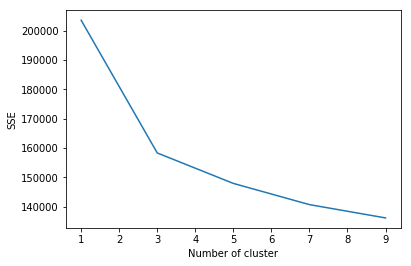

In [146]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
from sklearn.cluster import KMeans
sse = {}
for k in range(1,10,2):
    kmeans = KMeans(n_clusters=k, max_iter=1000,n_jobs=-1).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Wordcloud

In [148]:
model=KMeans(n_clusters=3,max_iter=100)
model.fit(data)
wcl=model.labels_.tolist()

In [151]:
X_train['Clusters']=wcl

In [156]:
class0=" ".join(review for review in X_train[X_train['Clusters']==0]['essay'])
class1=" ".join(review for review in X_train[X_train['Clusters']==1]['essay'])
class2=" ".join(review for review in X_train[X_train['Clusters']==2]['essay'])

# Summary

In [68]:
a=X_train[X_train['text']==0]
a.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count   12030.000000                                  12030.000000   
mean    90912.382045                                     11.735245   
std     52914.077731                                     30.122967   
min        14.000000                                      0.000000   
25%     44924.500000                                      0.000000   
50%     90685.000000                                      2.000000   
75%    137066.500000                                      9.000000   
max    182072.000000                                    437.000000   

              price      quantity     text  
count  12030.000000  12030.000000  12030.0  
mean     296.322293     16.468495      0.0  
std      327.492774     26.577727      0.0  
min        1.360000      1.000000      0.0  
25%      106.407500      4.000000      0.0  
50%      214.330000      8.000000      0.0  
75%      386.135000     20.000000      0.0  
max     9999.000000    900.000000      0.0

In [70]:
b=X_train[X_train['text']==1]
b.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count    5814.000000                                   5814.000000   
mean    91239.814241                                     11.151703   
std     53173.294516                                     25.469843   
min        64.000000                                      0.000000   
25%     44845.500000                                      0.000000   
50%     91519.500000                                      3.000000   
75%    137367.500000                                     10.000000   
max    182067.000000                                    354.000000   

             price     quantity    text  
count  5814.000000  5814.000000  5814.0  
mean    274.103165    16.597867     1.0  
std     302.294576    25.299200     0.0  
min       1.550000     1.000000     1.0  
25%      99.965000     4.000000     1.0  
50%     187.900000     9.000000     1.0  
75%     353.922500    20.000000     1.0  
max    4015.050000   581.000000     1.0

In [72]:
c=X_train[X_train['text']==2]
c.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count    6676.000000                                   6676.000000   
mean    91433.672558                                     10.737567   
std     52840.545700                                     25.727323   
min        48.000000                                      0.000000   
25%     45412.000000                                      0.000000   
50%     91682.000000                                      2.000000   
75%    137172.250000                                      8.000000   
max    182073.000000                                    281.000000   

             price     quantity    text  
count  6676.000000  6676.000000  6676.0  
mean    323.067798    18.775315     2.0  
std     459.677271    28.308501     0.0  
min       0.900000     1.000000     2.0  
25%     101.642500     3.000000     2.0  
50%     208.695000     9.000000     2.0  
75%     397.257500    24.000000     2.0  
max    9999.000000   527.000000     2.0

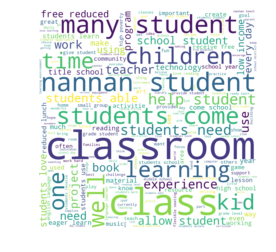

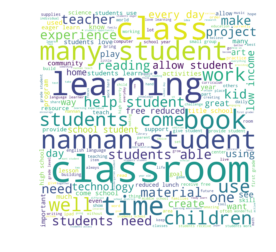

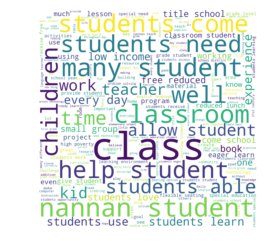

In [157]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
stopwords.update(X_train.columns)
# Generate a word cloud image
wordcloud0=wordcloud = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(class0)
wordcloud1=wordcloud = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(class1)
wordcloud2=wordcloud = WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(class2)
plt.imshow(wordcloud0,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis("off")
plt.show()

<h2>2.6 Apply AgglomerativeClustering</h2>

In [182]:
Xagg=X[:5000]

In [168]:
from sklearn.cluster import AgglomerativeClustering
agc= AgglomerativeClustering(n_clusters=2).fit(Xagg)
agcl=agc.labels_.tolist()

In [183]:
Xtrr=X_train[:5000]

In [185]:
Xtrr['AggClusters']=agcl

In [188]:
classagg0=" ".join(review for review in Xtrr[Xtrr['AggClusters']==0]['essay'])
classagg1=" ".join(review for review in Xtrr[Xtrr['AggClusters']==1]['essay'])

In [190]:
aagg=Xtrr[Xtrr['AggClusters']==0]
aagg.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count    2822.000000                                   2822.000000   
mean    90353.875620                                     12.436215   
std     52220.008656                                     29.289265   
min        44.000000                                      0.000000   
25%     45627.750000                                      0.000000   
50%     89222.000000                                      2.000000   
75%    136681.750000                                     10.000000   
max    182061.000000                                    386.000000   

             price     quantity     Clusters  AggClusters  
count  2822.000000  2822.000000  2822.000000       2822.0  
mean    284.667367    18.645641     0.873494          0.0  
std     347.046896    25.267289     0.901344          0.0  
min       0.900000     1.000000     0.000000          0.0  
25%      99.980000     4.000000     0.000000          0.0  
50%     199.990000    10.000000     1.000000          0.0  
75%     367.822500    24.000000     2.000000          0.0  
max    9534.670000   316.000000     2.000000          0.0

In [191]:
bagg=Xtrr[Xtrr['AggClusters']==1]
bagg.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count    2178.000000                                   2178.000000   
mean    91586.187328                                     10.121212   
std     52935.102596                                     27.777315   
min       100.000000                                      0.000000   
25%     46330.500000                                      0.000000   
50%     91607.500000                                      2.000000   
75%    137910.250000                                      7.000000   
max    182062.000000                                    437.000000   

             price     quantity     Clusters  AggClusters  
count  2178.000000  2178.000000  2178.000000       2178.0  
mean    307.366217    14.571166     1.228191          1.0  
std     341.085909    23.511639     0.840409          0.0  
min       0.660000     1.000000     0.000000          1.0  
25%     114.027500     3.000000     0.000000          1.0  
50%     215.340000     7.000000     1.000000          1.0  
75%     380.550000    17.000000     2.000000          1.0  
max    4722.220000   325.000000     2.000000          1.0

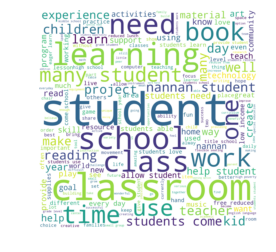

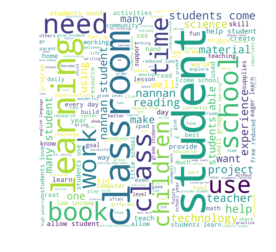

In [192]:
wordcloudagg0= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg0)
wordcloudagg1= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg1)
plt.imshow(wordcloudagg0,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloudagg1,interpolation='bilinear')
plt.axis("off")
plt.show()

<h2>2.7 Apply DBSCAN</h2>

In [203]:
xdb=newx[:5000]

In [298]:
xdbarr=xdb.toarray()

In [300]:
xdbarr.shape

(5000, 5000)

In [263]:
X_dbtr=X[:5000]

In [303]:
#https://stackoverflow.com/questions/48010276/how-to-estimate-eps-using-knn-distance-plot-in-dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
def FindEps():
    nbr=NearestNeighbors(n_neighbors=3).fit(xdbarr)
    dist,ix=nbr.kneighbors(xdbarr)
    distdesc=sorted(dist[:,2],reverse=False)
    plt.plot(ix[:,0],distdesc)
    plt.show()
    
    

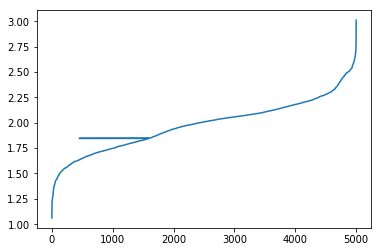

In [304]:
FindEps()

In [311]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.50,min_samples=2).fit(xdb)

In [312]:
dbclusters=pd.DataFrame()
dbclusters['clusters']=dbscan.labels_
print(dbclusters['clusters'].unique())

[ 0 -1  1  2  3]


In [313]:
Xtrr['dbclusters']=dbscan.labels_

In [314]:
classagg0=" ".join(review for review in Xtrr[Xtrr['dbclusters']==0]['essay'])
classagg1=" ".join(review for review in Xtrr[Xtrr['dbclusters']==1]['essay'])
classagg2=" ".join(review for review in Xtrr[Xtrr['dbclusters']==2]['essay'])
classaggneg1=" ".join(review for review in Xtrr[Xtrr['dbclusters']==-1]['essay'])
classagg3=" ".join(review for review in Xtrr[Xtrr['dbclusters']==3]['essay'])

In [317]:
classdbneg1=Xtrr[Xtrr['dbclusters']==-1]
classdbneg1.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count      68.000000                                     68.000000   
mean    87459.970588                                      9.058824   
std     49884.039527                                     21.416887   
min      3377.000000                                      0.000000   
25%     44818.000000                                      0.000000   
50%     82976.000000                                      2.000000   
75%    128375.750000                                      6.250000   
max    173951.000000                                    137.000000   

             price   quantity   Clusters  AggClusters  dbclusters  
count    68.000000  68.000000  68.000000    68.000000        68.0  
mean    341.159118  14.088235   0.441176     0.132353        -1.0  
std     375.804780  18.764634   0.780018     0.341394         0.0  
min       8.990000   1.000000   0.000000     0.000000        -1.0  
25%     127.470000   2.000000   0.000000     0.000000        -1.0  
50%     237.285000   6.000000   0.000000     0.000000        -1.0  
75%     405.157500  20.500000   1.000000     0.000000        -1.0  
max    1998.360000  90.000000   2.000000     1.000000        -1.0

In [318]:
classdb0=Xtrr[Xtrr['dbclusters']==0]
classdb0.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count    4925.000000                                   4925.000000   
mean    90978.847107                                     11.400203   
std     52541.236352                                     28.618879   
min        44.000000                                      0.000000   
25%     46077.000000                                      0.000000   
50%     90720.000000                                      2.000000   
75%    137386.000000                                      9.000000   
max    182062.000000                                    437.000000   

             price     quantity     Clusters  AggClusters  dbclusters  
count  4925.000000  4925.000000  4925.000000  4925.000000      4925.0  
mean    293.484124    16.923452     1.037157     0.440406         0.0  
std     343.104892    24.682707     0.891584     0.496486         0.0  
min       0.660000     1.000000     0.000000     0.000000         0.0  
25%     104.970000     4.000000     0.000000     0.000000         0.0  
50%     205.910000     9.000000     1.000000     0.000000         0.0  
75%     374.150000    21.000000     2.000000     1.000000         0.0  
max    9534.670000   325.000000     2.000000     1.000000         0.0

In [319]:
classdb1=Xtrr[Xtrr['dbclusters']==1]
classdb1.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count       2.000000                                           2.0   
mean   151366.500000                                           1.0   
std     14637.817477                                           0.0   
min    141016.000000                                           1.0   
25%    146191.250000                                           1.0   
50%    151366.500000                                           1.0   
75%    156541.750000                                           1.0   
max    161717.000000                                           1.0   

            price   quantity  Clusters  AggClusters  dbclusters  
count    2.000000   2.000000       2.0          2.0         2.0  
mean   345.215000   9.500000       0.0          0.0         1.0  
std    222.349727   9.192388       0.0          0.0         0.0  
min    187.990000   3.000000       0.0          0.0         1.0  
25%    266.602500   6.250000       0.0          0.0         1.0  
50%    345.215000   9.500000       0.0          0.0         1.0  
75%    423.827500  12.750000       0.0          0.0         1.0  
max    502.440000  16.000000       0.0          0.0         1.0

In [320]:
classdb2=Xtrr[Xtrr['dbclusters']==2]
classdb2.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects       price  \
count      2.000000                                      2.000000    2.000000   
mean   55728.500000                                     92.000000  177.430000   
std    54206.098739                                    121.622366  204.269007   
min    17399.000000                                      6.000000   32.990000   
25%    36563.750000                                     49.000000  105.210000   
50%    55728.500000                                     92.000000  177.430000   
75%    74893.250000                                    135.000000  249.650000   
max    94058.000000                                    178.000000  321.870000   

       quantity  Clusters  AggClusters  dbclusters  
count   2.00000       2.0          2.0         2.0  
mean    6.50000       1.0          0.0         2.0  
std     2.12132       0.0          0.0         0.0  
min     5.00000       1.0          0.0         2.0  
25%     5.75000       1.0          0.0         2.0  
50%     6.50000       1.0          0.0         2.0  
75%     7.25000       1.0          0.0         2.0  
max     8.00000       1.0          0.0         2.0

In [321]:
classdb3=Xtrr[Xtrr['dbclusters']==3]
classdb3.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count      3.000000                                      3.000000   
mean    7021.000000                                     63.666667   
std     5113.728679                                     55.184539   
min     1642.000000                                      1.000000   
25%     4621.500000                                     43.000000   
50%     7601.000000                                     85.000000   
75%     9710.500000                                     95.000000   
max    11820.000000                                    105.000000   

             price   quantity  Clusters  AggClusters  dbclusters  
count     3.000000   3.000000       3.0          3.0         3.0  
mean   1040.503333   5.333333       0.0          0.0         3.0  
std    1140.938520   5.131601       0.0          0.0         0.0  
min     108.590000   1.000000       0.0          0.0         3.0  
25%     404.290000   2.500000       0.0          0.0         3.0  
50%     699.990000   4.000000       0.0          0.0         3.0  
75%    1506.460000   7.500000       0.0          0.0         3.0  
max    2312.930000  11.000000       0.0          0.0         3.0

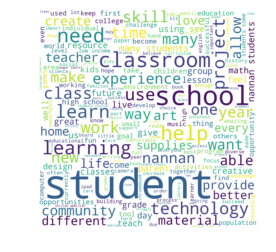

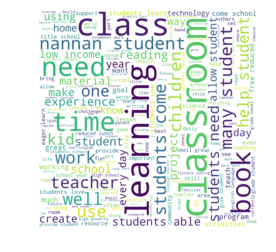

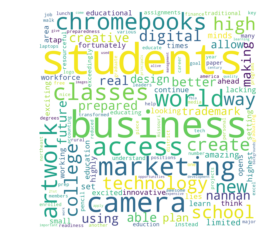

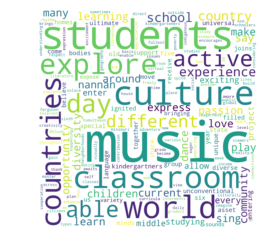

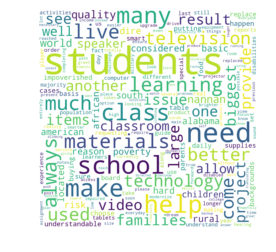

In [315]:
wordcloudagg0= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg0)
wordcloudagg1= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg1)
wordcloudagg2= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg2)
wordcloudaggneg1= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classaggneg1)
wordcloudagg3= WordCloud(width=1500,height=1500,stopwords=stopwords, background_color="white").generate(classagg3)
plt.imshow(wordcloudaggneg1,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloudagg0,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloudagg1,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloudagg2,interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloudagg3,interpolation='bilinear')
plt.axis("off")
plt.show()

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.